In [81]:
import pandas as pd

math_df= pd.read_csv('dataset/student-mat.csv', sep=';')
lang_df=pd.read_csv('dataset/student-por.csv', sep=';')

In [82]:
# 수학 데이터셋 확인
print("\nMath Dataset Info:")
print(math_df.info())


Math Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    ob

In [83]:
# 언어 데이터셋 확인
print("\nPortuguese Dataset Info:")
print(lang_df.info())


Portuguese Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null

Math Grades Correlation Matrix:
          G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000


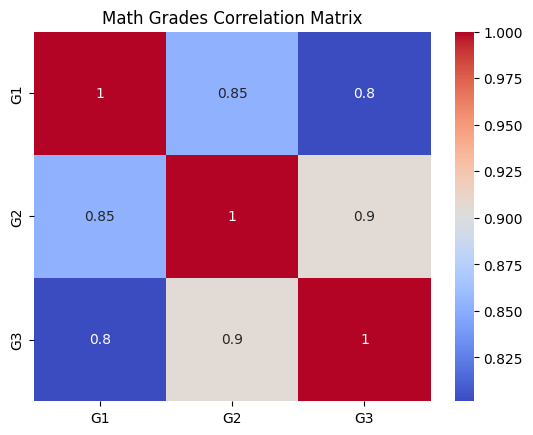

Math Grades Cronbach's Alpha: 0.9456016978765865


In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 수학 데이터셋의 G1, G2, G3 선택
math_grades = math_df[['G1', 'G2', 'G3']]

# 상관관계 계산
math_corr = math_grades.corr()
print("Math Grades Correlation Matrix:")
print(math_corr)

# 상관관계 시각화
sns.heatmap(math_corr, annot=True, cmap='coolwarm')
plt.title('Math Grades Correlation Matrix')
plt.show()

# 크론바흐 알파 계산 함수
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    mean_corr = df_corr.values[np.triu_indices(N, 1)].mean()
    alpha = (N * mean_corr) / (1 + (N - 1) * mean_corr)
    return alpha

# 크론바흐 알파 계산
math_alpha = cronbach_alpha(math_grades)
print(f"Math Grades Cronbach's Alpha: {math_alpha}")


Portuguese Grades Correlation Matrix:
          G1        G2        G3
G1  1.000000  0.864982  0.826387
G2  0.864982  1.000000  0.918548
G3  0.826387  0.918548  1.000000


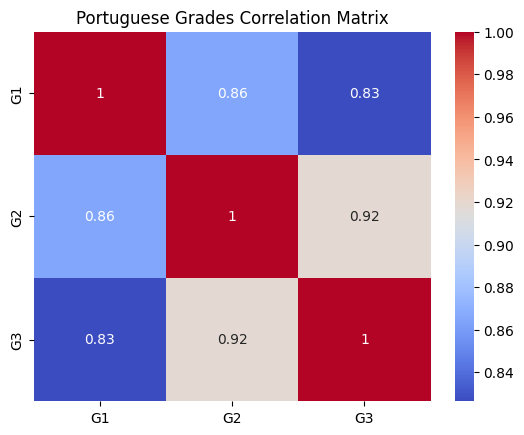

Portuguese Grades Cronbach's Alpha: 0.9525436566908242


In [85]:
# 포르투갈어 데이터셋의 G1, G2, G3 선택
lang_grades = lang_df[['G1', 'G2', 'G3']]

# 상관관계 계산
lang_corr = lang_grades.corr()
print("Portuguese Grades Correlation Matrix:")
print(lang_corr)

# 상관관계 시각화
sns.heatmap(lang_corr, annot=True, cmap='coolwarm')
plt.title('Portuguese Grades Correlation Matrix')
plt.show()

# 크론바흐 알파 계산
lang_alpha = cronbach_alpha(lang_grades)
print(f"Portuguese Grades Cronbach's Alpha: {lang_alpha}")


In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
math_grades_scaled = scaler.fit_transform(math_grades)

# PCA 수행
pca_math = PCA(n_components=1)
math_principal_component = pca_math.fit_transform(math_grades_scaled)

# 주성분으로부터 새로운 칼럼 생성
math_df['G_PCA'] = math_principal_component

# 설명된 분산 비율 확인
math_explained_variance = pca_math.explained_variance_ratio_
print(f'Math Grades Explained Variance Ratio: {math_explained_variance}')

# 주성분의 가중치 확인
math_components = pca_math.components_
print(f'Math PCA Components (Loadings):\n{math_components}')


Math Grades Explained Variance Ratio: [0.90211111]
Math PCA Components (Loadings):
[[-0.56536058 -0.58871014 -0.5777437 ]]


In [87]:
# 데이터 스케일링
lang_grades_scaled = scaler.fit_transform(lang_grades)

# PCA 수행
pca_lang = PCA(n_components=1)
lang_principal_component = pca_lang.fit_transform(lang_grades_scaled)

# 주성분으로부터 새로운 칼럼 생성
lang_df['G_PCA'] = lang_principal_component

# 설명된 분산 비율 확인
lang_explained_variance = pca_lang.explained_variance_ratio_
print(f'Portuguese Grades Explained Variance Ratio: {lang_explained_variance}')

# 주성분의 가중치 확인
lang_components = pca_lang.components_
print(f'Portuguese PCA Components (Loadings):\n{lang_components}')


Portuguese Grades Explained Variance Ratio: [0.9134983]
Portuguese PCA Components (Loadings):
[[-0.56638439 -0.58685171 -0.57863096]]


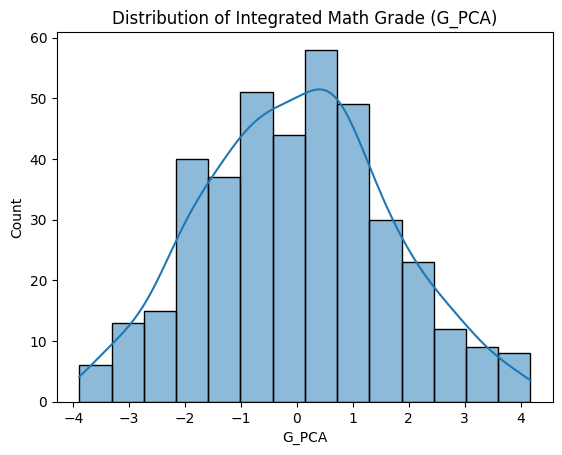

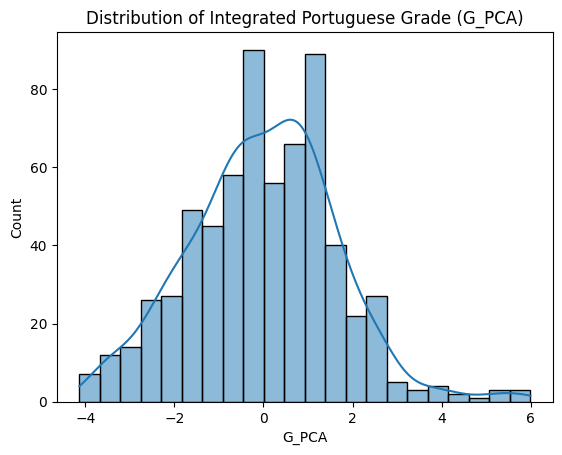

In [88]:
# 수학 통합 성적 분포
sns.histplot(math_df['G_PCA'], kde=True)
plt.title('Distribution of Integrated Math Grade (G_PCA)')
plt.xlabel('G_PCA')
plt.show()

# 포르투갈어 통합 성적 분포
sns.histplot(lang_df['G_PCA'], kde=True)
plt.title('Distribution of Integrated Portuguese Grade (G_PCA)')
plt.xlabel('G_PCA')
plt.show()


In [89]:
# 수학 데이터셋
math_pca_df = pd.DataFrame({
    'G_PCA': math_principal_component.flatten(),
    'G1': math_df['G1'],
    'G2': math_df['G2'],
    'G3': math_df['G3']
})
print("Math Grades and PCA Correlation:")
print(math_pca_df.corr())

# 포르투갈어 데이터셋
lang_pca_df = pd.DataFrame({
    'G_PCA': lang_principal_component.flatten(),
    'G1': lang_df['G1'],
    'G2': lang_df['G2'],
    'G3': lang_df['G3']
})
print("Portuguese Grades and PCA Correlation:")
print(lang_pca_df.corr())


Math Grades and PCA Correlation:
          G_PCA        G1        G2        G3
G_PCA  1.000000 -0.930071 -0.968483 -0.950443
G1    -0.930071  1.000000  0.852118  0.801468
G2    -0.968483  0.852118  1.000000  0.904868
G3    -0.950443  0.801468  0.904868  1.000000
Portuguese Grades and PCA Correlation:
          G_PCA        G1        G2        G3
G_PCA  1.000000 -0.937618 -0.971500 -0.957891
G1    -0.937618  1.000000  0.864982  0.826387
G2    -0.971500  0.864982  1.000000  0.918548
G3    -0.957891  0.826387  0.918548  1.000000


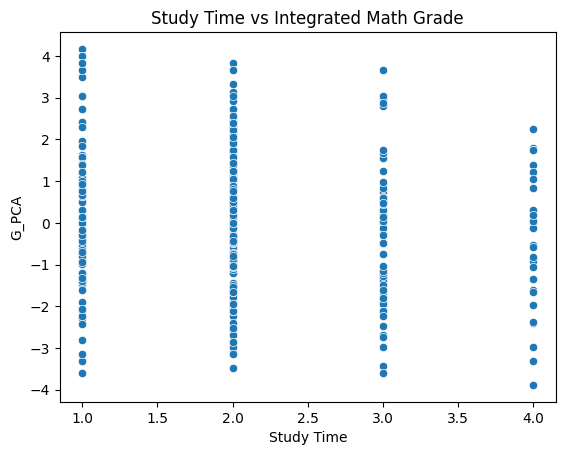

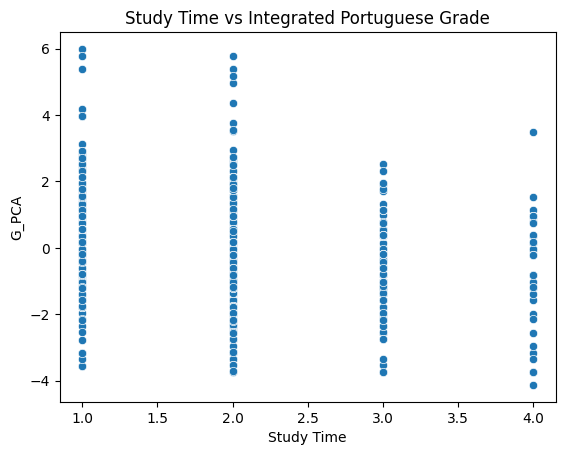

In [90]:
# 수학 데이터셋
sns.scatterplot(x='studytime', y='G_PCA', data=math_df)
plt.title('Study Time vs Integrated Math Grade')
plt.xlabel('Study Time')
plt.ylabel('G_PCA')
plt.show()

# 포르투갈어 데이터셋
sns.scatterplot(x='studytime', y='G_PCA', data=lang_df)
plt.title('Study Time vs Integrated Portuguese Grade')
plt.xlabel('Study Time')
plt.ylabel('G_PCA')
plt.show()


Mean Squared Error (MSE): 2.2600
R-squared (R²): 0.2421


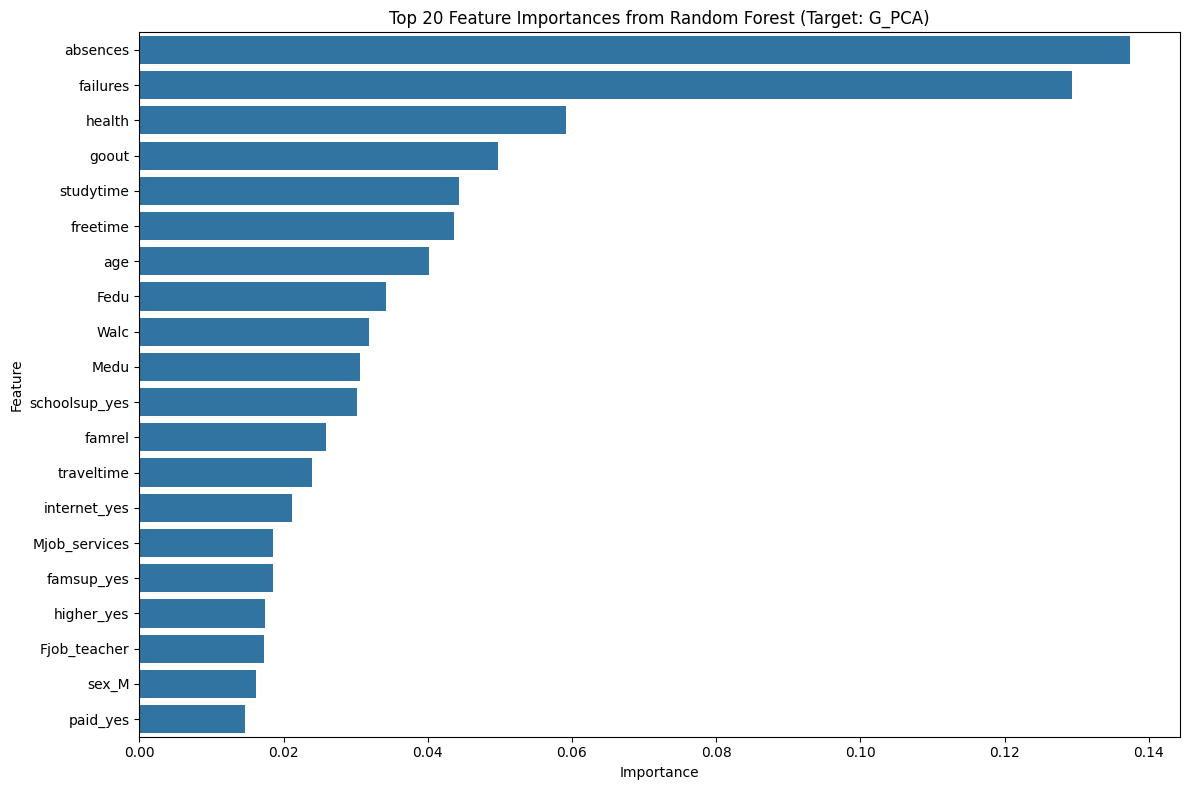

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
math_df = pd.read_csv('dataset/student-mat.csv', sep=';')

# G1, G2, G3 성적 데이터 추출
grades = math_df[['G1', 'G2', 'G3']]

# 데이터 스케일링
scaler = StandardScaler()
grades_scaled = scaler.fit_transform(grades)

# PCA 수행
pca = PCA(n_components=1)
principal_component = pca.fit_transform(grades_scaled)

# 주성분으로부터 새로운 칼럼 생성
math_df['G_PCA'] = principal_component

# 타깃 변수와 특징 변수 분리
y = math_df['G_PCA']
X = math_df.drop(columns=['G1', 'G2', 'G3', 'G_PCA'])

# 범주형 변수 식별 및 인코딩
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# 피처 중요도 추출 및 시각화
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 상위 20개 피처 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances from Random Forest (Target: G_PCA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 2.3860
R-squared (R²): 0.1805


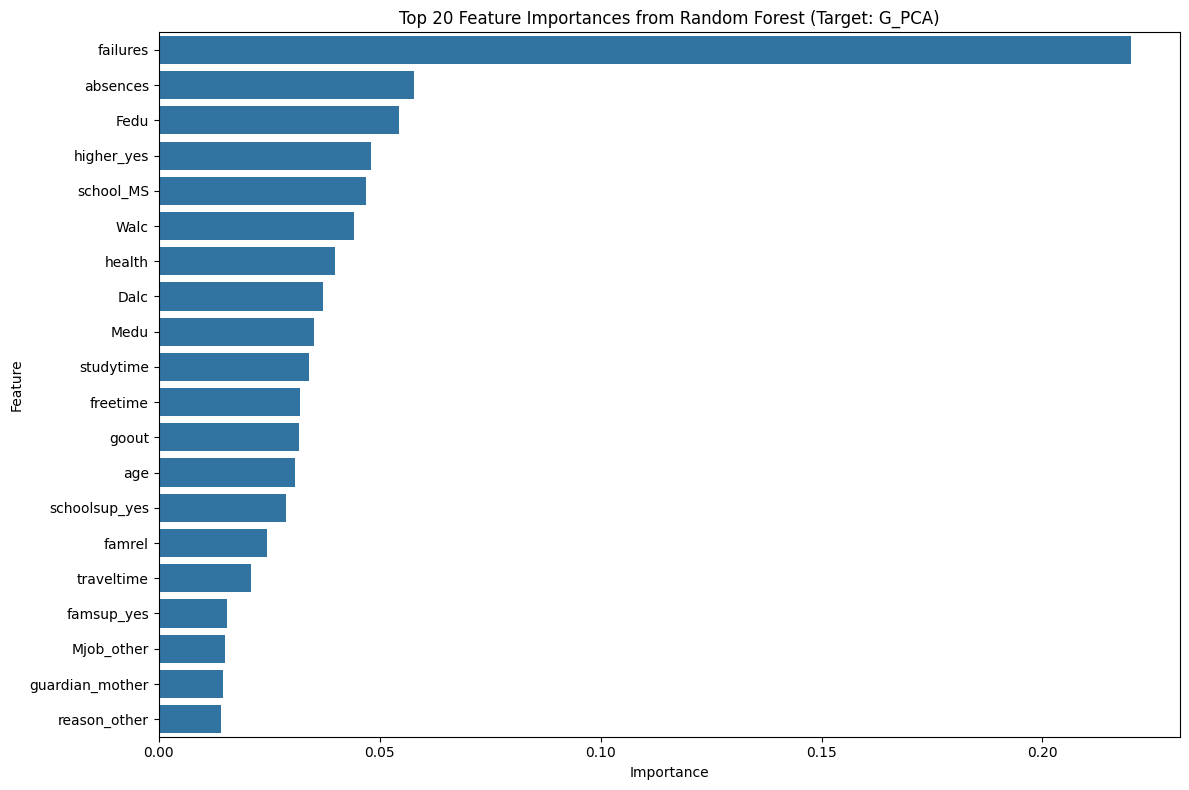

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
lang_df = pd.read_csv('dataset/student-por.csv', sep=';')

# G1, G2, G3 성적 데이터 추출
grades = lang_df[['G1', 'G2', 'G3']]

# 데이터 스케일링
scaler = StandardScaler()
grades_scaled = scaler.fit_transform(grades)

# PCA 수행
pca = PCA(n_components=1)
principal_component = pca.fit_transform(grades_scaled)

# 주성분으로부터 새로운 칼럼 생성
lang_df['G_PCA'] = principal_component

# 타깃 변수와 특징 변수 분리
y = lang_df['G_PCA']
X = lang_df.drop(columns=['G1', 'G2', 'G3', 'G_PCA'])

# 범주형 변수 식별 및 인코딩
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# 피처 중요도 추출 및 시각화
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 상위 20개 피처 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances from Random Forest (Target: G_PCA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [93]:
# 특성 이름 저장
feature_names = X_encoded.columns.tolist()
feature_names = X.columns.tolist()
# 특성 이름을 파일로 저장
import json
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)

# 모델 저장
import joblib
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# 데이터 로드
math_df = pd.read_csv('dataset/student-mat.csv', sep=';')

# G1, G2, G3 성적 데이터 추출
grades = math_df[['G1', 'G2', 'G3']]

# 성적 평균 계산
math_df['G_avg'] = grades.mean(axis=1)

# 타깃 변수와 특징 변수 분리
y = math_df['G_avg']
X = math_df.drop(columns=['G1', 'G2', 'G3', 'G_avg'])

# 수치형 및 범주형 변수 구분
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 파이프라인 구성
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# 전체 파이프라인 구성
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 모델 훈련
pipeline.fit(X_train, y_train)

# 모델 저장
joblib.dump(pipeline, 'project/source/model_pipeline.pkl')
print("모델이 성공적으로 저장되었습니다.")


모델이 성공적으로 저장되었습니다.
